In [88]:
from sympy import *
import numpy as np
import pandas as pd
from copy import copy,deepcopy
import random
import matplotlib.pyplot as plt
import sys
import networkx as nx 
from networkx.algorithms.approximation import clique 
from networkx.algorithms import clique as clique2

In [46]:
def plotCA(data,size=(20,10)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(data,plt.cm.Greys)
    plt.ylabel("steps",fontsize="large")
    for i in range(len(data)):
        for j in range(len(data[i])):
            c = "w"
            if data[i][j] <= 2:
                c = "black"
            text = ax.text(j, i, data[i][j],
                           ha="center", va="center", color=c,fontsize="large")
    plt.show()

def dictToMat(dic):
    matrix = []
    for key in dic:
        for key2 in dic[key]:
            temp = copy(dic[key][key2])
            temp.append(key)
            matrix.append(temp)
    return matrix

def getDomain(data):
    #encontramos los valores observados de cada atributo en los subproblemas de aprendizaje
    domain = {}
    for row in data:
        for j,col in enumerate(row):
            if j not in domain:
                domain[j] = []
            if col not in domain[j]:
                domain[j].append(col)
    for key in domain:
        domain[key].sort()
    return domain

def binarize(data):
    #binarizamos los subproblemas de aprendizaje
    binarizedMatrix = []
    for row in data:
        rtemp = []
        for j,col in enumerate(row):
            if j < len(row)-1:
                for val in domain[j]:
                    if col >= val:
                        rtemp.append(1)
                    else:
                        rtemp.append(0)
            else:
                rtemp.append(col)
        binarizedMatrix.append(rtemp)
    return binarizedMatrix

def getNeighbors(dataframe,r):
    #creamos un problema de aprendizaje para cada celda
    neighbors = {}
    for i,row in dataframe.iterrows():
        for j in range(len(dataframe.columns)):
            if j not in neighbors:
                neighbors[j] = []
            temp = []
            for x in range(1,(r+1)):
                if (j-x) < 0:
                    temp.append(0)
                else:
                    temp.append(row[j-x])
            temp.append(row[j])
            for x in range(1,(r+1)):
                if (j+x) >= len(dataframe.columns):
                    temp.append(0)
                else:
                    temp.append(row[j+x])
            neighbors[j].append(temp)
    return neighbors

def getClassState(neighbors):
    problem = {}
    for col in neighbors:
        for row in range(1,len(neighbors[col])):
            icenter = floor(len(neighbors[col][row])/2)
            if neighbors[col][row][icenter] not in problem:
                problem[neighbors[col][row][icenter]] = {}
            k = ",".join(map(str,neighbors[col][row-1]))
            if k not in problem[neighbors[col][row][icenter]]:
                problem[neighbors[col][row][icenter]][k] = neighbors[col][row-1]
    return problem

def getPosNeg(domain,binarized):
    # obtenemos los ejemplos positivos y negativos para el atributo x[1] de los subproblemas
    keys = list(domain.keys())
    pos_neg = {}
    pos = {}
    for row in binarized:
        for val in domain[keys[-1]]:
            if val not in pos_neg:
                pos_neg[val] = {"pos":[],"neg":[]}
            if val not in pos:
                pos[val] = {}
            temp = "".join(map(str,row[:-1]))
            if val == row[-1]:
                if temp not in pos[val]:
                    pos_neg[val]["pos"].append(row[:-1])
                    pos[val][temp] = 0 
            else:
                if temp not in pos[val]:
                    pos_neg[val]["neg"].append(row[:-1])
                    pos[val][temp] = 0 
    return pos_neg

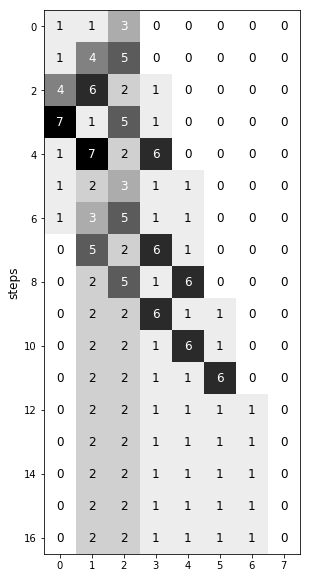

In [3]:
dataframe = pd.read_csv("data/2_square.csv")
plotCA(dataframe.values)

In [114]:
radious = 1

In [115]:
neighbors = getNeighbors(dataframe,radious)

In [116]:
problem = getClassState(neighbors)

In [117]:
matrix = dictToMat(problem)

In [118]:
domain = getDomain(matrix)

In [119]:
binarized = binarize(matrix)
np.shape(binarized)

(51, 25)

In [120]:
posNeg = getPosNeg(domain,binarized)

In [121]:
pregraph = {}
for cls in domain[list(domain.keys())[-1]]:
    if cls not in pregraph:
        pregraph[cls] = {}
    nRows,nCols = np.shape(binarized)
    for i,row in enumerate(binarized):
        if row[-1] != cls:
            for j in range(i,nRows):
                row2 = binarized[j]
                if row2[-1] != cls:
                    pair = "{},{}".format(i,j)
                    if pair not in pregraph[cls]:
                        pregraph[cls][pair] = [[],[]]
                    for k in range(nCols-1):
                        if row2[k] == row[k]:
                            val = row2[k]
                            pregraph[cls][pair][val].append(k)
                        else:
                            val1 = row2[k]
                            val2 = row[k]
                            pregraph[cls][pair][val1].append(k)
                            pregraph[cls][pair][val2].append(k
pregraph

SyntaxError: invalid syntax (<ipython-input-121-3dcd8ccc328f>, line 23)

In [122]:
for cls in pregraph:
    for pair in pregraph[cls]:
        for row in posNeg[cls]["pos"]:
            for j in range(len(row)):
                val = row[j]
                try:
                    pregraph[cls][pair][val].remove(j)
                except:
                    pass
pregraph    

{0: {'0,0': [[], []],
  '0,1': [[], [22, 23]],
  '0,2': [[], [30, 31]],
  '0,3': [[], []],
  '0,4': [[], [4, 22]],
  '0,5': [[], [4, 5]],
  '0,6': [[], []],
  '0,7': [[], [15, 22]],
  '0,8': [[], []],
  '0,9': [[], [22]],
  '0,10': [[], [22]],
  '0,11': [[], [30]],
  '0,12': [[], [37]],
  '0,13': [[], []],
  '0,14': [[], [4, 5, 6]],
  '0,15': [[], []],
  '0,16': [[], []],
  '0,17': [[], [22]],
  '0,18': [[], [22]],
  '0,19': [[], [30]],
  '0,20': [[], []],
  '0,21': [[], [4, 5, 6]],
  '0,22': [[], []],
  '0,23': [[], [22]],
  '0,24': [[], []],
  '0,25': [[], []],
  '0,26': [[], []],
  '0,27': [[], []],
  '0,28': [[], [30]],
  '0,29': [[], [4, 5, 6, 7]],
  '0,44': [[], []],
  '0,45': [[], [4, 5]],
  '0,46': [[], [4, 5]],
  '0,47': [[], [4, 5, 30]],
  '0,48': [[], [4, 5, 6]],
  '0,49': [[], [4, 5, 6]],
  '0,50': [[], [4, 5, 6]],
  '0,51': [[], [22, 23, 37]],
  '0,52': [[], [37]],
  '0,53': [[], []],
  '0,54': [[], [37]],
  '0,55': [[], []],
  '0,56': [[], [4]],
  '0,57': [[], [15]],
  '0

In [125]:
graphs = {}
for cls in pregraph:
    G = nx.Graph()
    G.add_nodes_from([x for i in range(len(binarized))])
    for pair in pregraph[cls]:
        if len(pregraph[cls][pair][0]) > 0 or len(pregraph[cls][pair][1]) > 0:
            temp = pair.split(",")
            n1 = int(temp[0])
            n2 = int(temp[1])
            G.add_edge(n1,n2,color='red')
    graphs[cls] = G
graphs

{0: <networkx.classes.graph.Graph at 0xa5ebdf550>,
 1: <networkx.classes.graph.Graph at 0xaab5d3710>,
 2: <networkx.classes.graph.Graph at 0xa5ebdf668>,
 3: <networkx.classes.graph.Graph at 0xa5ebdf710>,
 4: <networkx.classes.graph.Graph at 0xa5ebdf6a0>,
 5: <networkx.classes.graph.Graph at 0xa5ec367f0>,
 6: <networkx.classes.graph.Graph at 0xa5ec36710>,
 7: <networkx.classes.graph.Graph at 0xa5ebdf6d8>}

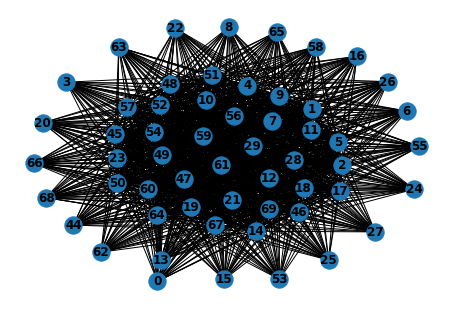

In [126]:
nx.draw(graphs[0], with_labels=True, font_weight='bold')

In [129]:
maxCliques = {}
cliques = {}
for cls in graphs:
    #clique.clique_removal(graphs[cls][0])
    maxClique = clique.max_clique(graphs[cls])
    cliques[cls] = clique2.find_cliques(graphs[cls])
    maxCliques[cls] = maxClique
    print(len([x for x in cliques[cls]]))
    #graphs[cls].remove_nodes_from(maxClique)

22
42
44
4
2
32
17
5


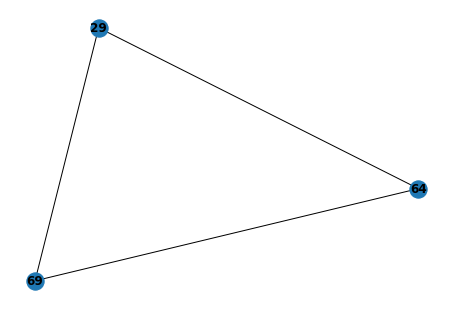

In [128]:
nx.draw(graphs[1].subgraph(maxCliques[1]), with_labels=True, font_weight='bold')

In [109]:
len(posNeg[0]["neg"])

56